In [231]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# from sklearn.ensemble import RandomForestClassifier = is for discrete numbers (labels) not for float values

In [232]:
df = pd.read_csv('googleplaystore.csv')

In [135]:
# Display first five rows

df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [136]:
# display last 5 rows

df.tail()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device
10840,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device


In [137]:
# display information about the dataset

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


In [138]:
# checking data types of each column

df.dtypes

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [233]:
# display main mathematical charachteristics

df.describe()

,Unnamed: 0,Rating
count,10841.000000,9367.000000
mean,5420.000000,4.193338
std,3129.671468,0.537431
min,0.000000,1.000000
25%,2710.000000,4.000000
50%,5420.000000,4.300000
75%,8130.000000,4.500000
max,10840.000000,19.000000


In [140]:
df[df.columns[-1]]

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10836            4.1 and up
10837            4.1 and up
10838            2.2 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 10841, dtype: object

In [234]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 12 categorical variables

The categorical variables are :

 ['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [235]:
# view the categorical variables

df[categorical].head()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('App').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Reviews').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Size').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Installs').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Reviews'].value_counts()
    for x_label, grp in _df_4.groupby('App')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('App')
_ = plt.ylabel('Reviews')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Size'].value_counts()
    for x_label, grp in _df_5.groupby('Reviews')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Reviews')
_ = plt.ylabel('Size')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Installs'].value_counts()
    for x_label, grp in _df_6.groupby('Size')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Size')
_ = plt.ylabel('Installs')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Content Rating'].value_counts()
    for x_label, grp in _df_7.groupby('Installs')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Installs')
_ = plt.ylabel('Content Rating')

In [237]:
# view null values total in categorical vars

df[categorical].isnull().sum()

App               0
Category          0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [238]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline


# view frequency distribution of categorical variables

for var in categorical:

    print(df[var].value_counts()/float(len(df)))


ROBLOX                                                0.000830
CBS Sports App - Scores, News, Stats & Watch Live     0.000738
ESPN                                                  0.000646
Duolingo: Learn Languages Free                        0.000646
Candy Crush Saga                                      0.000646
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.000092
U-Report                                              0.000092
U of I Community Credit Union                         0.000092
Waiting For U Launcher Theme                          0.000092
iHoroscope - 2018 Daily Horoscope & Astrology         0.000092
Name: App, Length: 9660, dtype: float64
FAMILY                 0.181902
GAME                   0.105525
TOOLS                  0.077760
MEDICAL                0.042708
BUSINESS               0.042432
PRODUCTIVITY           0.039111
PERSONALIZATION        0.036159
COMMUNICATION          0.035698
SPORTS     

In [239]:
# check labels in Type variable

df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [240]:
# check labels in Content Rating variable

df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [241]:
# check labels in Current Ver variable

df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [242]:
# check labels in Android Ver variable

df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [243]:
# displaying all columns / features & target var

df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [244]:
# each class how many records (Diagnosis)

df.value_counts()

Unnamed: 0  App                                             Category        Rating  Reviews  Size                Installs      Type  Price  Content Rating  Genres        Last Updated  Current Ver         Android Ver       
0           Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN  4.1     159      19M                 10,000+       Free  0      Everyone        Art & Design  7-Jan-18      1.0.0               4.0.3 and up          1
6860        Bacterial Vaginosis Symptoms                    MEDICAL         4.1     698      2.4M                100,000+      Free  0      Everyone 10+    Medical       3-Feb-15      1.1                 3.0 and up            1
6825        BU Students' Rep. Council                       FAMILY          4.7     38       5.3M                500+          Free  0      Everyone        Education     5-Jul-18      5.45.0_713          4.0 and up            1
6827        BU Calculator                                   FAMILY          4.6     69       

In [245]:
# drop unwanted columns

df. drop('Unnamed: 0', axis=1, inplace=True)

In [246]:
# drop unwanted columns

df. drop('Size', axis=1, inplace=True)

In [247]:
# displaying all columns once again to check existing columns after dropping unnecessary columns

df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [248]:
# Finding rows where 'Installs' cannot be converted to numeric
invalid_installs = df['Installs'].str.contains('^[a-zA-Z]', regex=True)
invalid_installs_rows = df[invalid_installs]

# Dropping these rows
df_cleaned = df[~invalid_installs]

# Try to convert once again
df_cleaned['Installs'] = df_cleaned['Installs'].str.replace('+', '').str.replace(',', '').astype(float)

# Checking the data types
df_cleaned.dtypes

<ipython-input-248-bc09da48c514>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cleaned['Installs'] = df_cleaned['Installs'].str.replace('+', '').str.replace(',', '').astype(float)
<ipython-input-248-bc09da48c514>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Installs'] = df_cleaned['Installs'].str.replace('+', '').str.replace(',', '').astype(float)


App                object
Category           object
Rating            float64
Reviews            object
Installs          float64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [249]:
# cleaned data

df_cleaned.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000.0,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000.0,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000.0,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000.0,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000.0,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


from matplotlib import pyplot as plt
_df_8['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Installs'].plot(kind='hist', bins=20, title='Installs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('App').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('Reviews').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('Content Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_13.groupby('Genres').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='Rating', y='Installs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Rating'].plot(kind='line', figsize=(8, 4), title='Rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Installs'].plot(kind='line', figsize=(8, 4), title='Installs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Reviews'].value_counts()
    for x_label, grp in _df_17.groupby('App')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('App')
_ = plt.ylabel('Reviews')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Content Rating'].value_counts()
    for x_label, grp in _df_18.groupby('Reviews')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Reviews')
_ = plt.ylabel('Content Rating')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Genres'].value_counts()
    for x_label, grp in _df_19.groupby('Content Rating')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Content Rating')
_ = plt.ylabel('Genres')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Last Updated'].value_counts()
    for x_label, grp in _df_20.groupby('Genres')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Genres')
_ = plt.ylabel('Last Updated')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['App'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='Rating', y='App', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Reviews'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='Rating', y='Reviews', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Content Rating'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='Rating', y='Content Rating', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Genres'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='Rating', y='Genres', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [251]:
# invalid data rows from the installs column

invalid_installs_rows

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [252]:
df_cleaned.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000.0,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000.0,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000.0,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000.0,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000.0,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [253]:
df_cleaned.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Installs          float64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [254]:
# Price column has $ sign hence before convert it to float, needs to remove the $ sign and then convert to float type

df_cleaned['Price_float'] = df_cleaned['Price'].str.replace('$', '').astype(float)

<ipython-input-254-47dc16c00bd1>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cleaned['Price_float'] = df_cleaned['Price'].str.replace('$', '').astype(float)
<ipython-input-254-47dc16c00bd1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price_float'] = df_cleaned['Price'].str.replace('$', '').astype(float)


In [255]:
# Convert 'Last Updated' to datetime format
df_cleaned['Last Updated_dt'] = pd.to_datetime(df_cleaned['Last Updated'], errors='coerce', format='%d-%b-%y')

<ipython-input-255-6d6551ef30e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Last Updated_dt'] = pd.to_datetime(df_cleaned['Last Updated'], errors='coerce', format='%d-%b-%y')


In [256]:
df_cleaned.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_float,Last Updated_dt
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000.0,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,0.0,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000.0,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,0.0,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000.0,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,0.0,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000.0,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,0.0,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000.0,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,0.0,2018-06-20


In [257]:
# Analysing Exploratory Data / EDA

# Checking for missing values
missing_values = df_cleaned.isnull().sum()
missing_values

App                   0
Category              0
Rating             1474
Reviews               0
Installs              0
Type                  1
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           8
Android Ver           2
Price_float           0
Last Updated_dt       0
dtype: int64

In [258]:
# Statistical summary of numeric columns

statistical_summary = df_cleaned.describe()
statistical_summary

,Rating,Installs,Price_float
count,9366.000000,1.084000e+04,10840.000000
mean,4.191757,1.546434e+07,1.027368
std,0.515219,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000
25%,4.000000,1.000000e+03,0.000000
50%,4.300000,1.000000e+05,0.000000
75%,4.500000,5.000000e+06,0.000000
max,5.000000,1.000000e+09,400.000000


In [259]:
# apply the log transformation with NumPy

df_cleaned['Installs_log'] = df_cleaned['Installs'].apply(lambda x: np.log(x + 1))

<ipython-input-259-31423d80ee93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Installs_log'] = df_cleaned['Installs'].apply(lambda x: np.log(x + 1))


In [260]:
# checking any null values

df_cleaned['Installs_log'].isnull().sum()

0

In [261]:
df_cleaned.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Price_float', 'Last Updated_dt', 'Installs_log'],
      dtype='object')

Text(0, 0.5, 'Frequency')

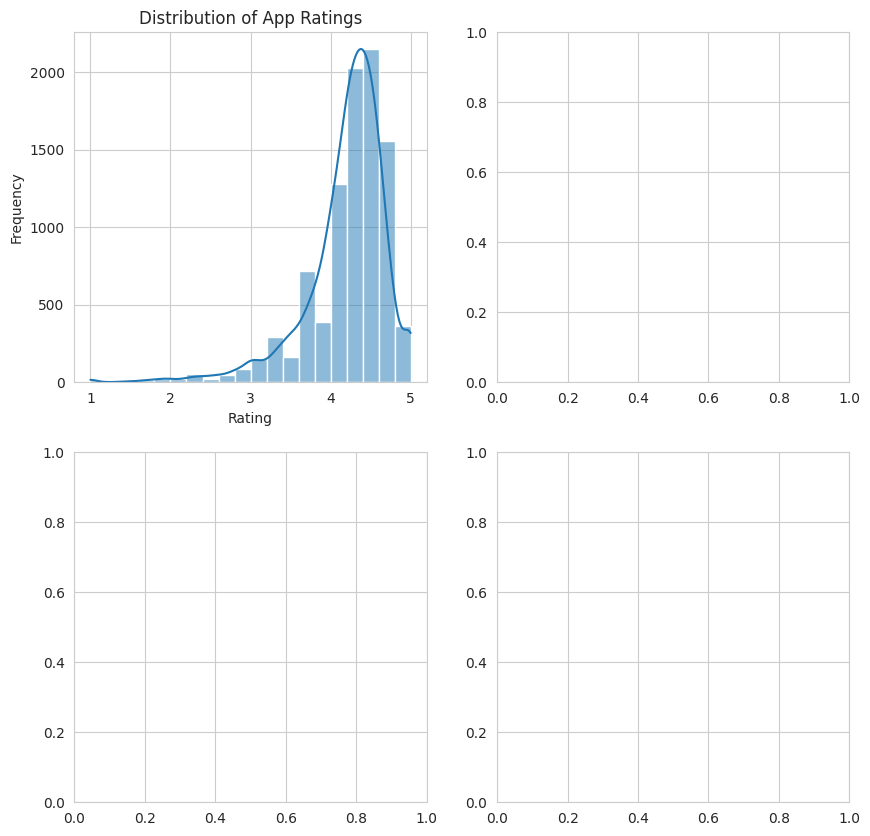

In [262]:
# set the aesthetic style of the plots

sns.set_style("whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(10, 10), dpi=100)

# histogram of App Ratings
sns.histplot(df_cleaned['Rating'].dropna(), bins=20, kde=True, ax=ax[0, 0])  # Drop NA values for clean plotting
ax[0, 0].set_title('Distribution of App Ratings')
ax[0, 0].set_xlabel('Rating')
ax[0, 0].set_ylabel('Frequency')

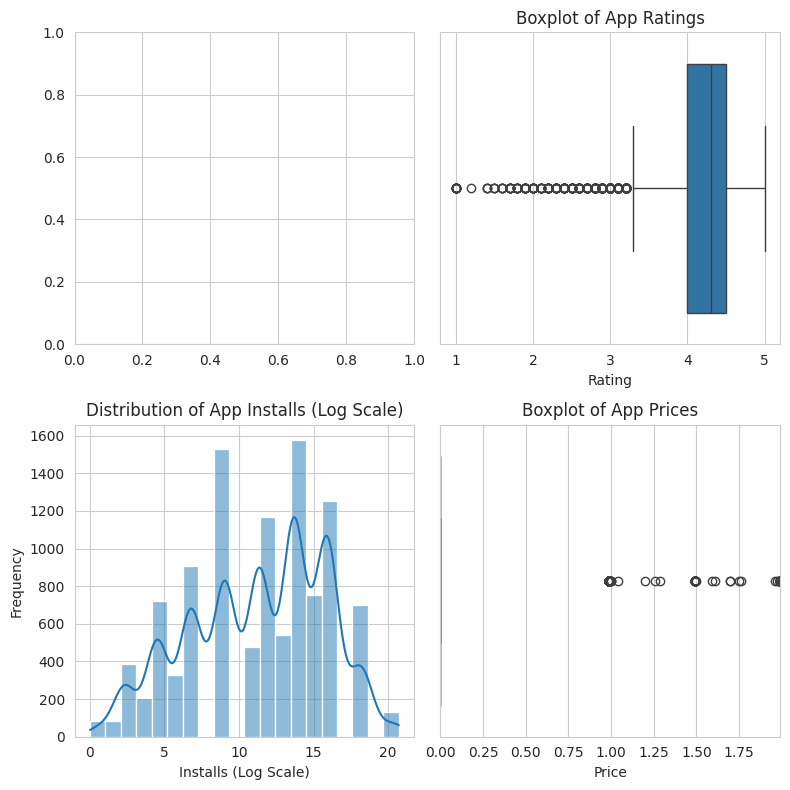

In [263]:
# boxplot of app Ratings

fig, ax = plt.subplots(2, 2, figsize=(8, 8), dpi=100)

sns.boxplot(x='Rating', data=df_cleaned, ax=ax[0, 1])
ax[0, 1].set_title('Boxplot of App Ratings')
ax[0, 1].set_xlabel('Rating')


# histogram of App Installs (Using Log-Transformed Data)

sns.histplot(df_cleaned['Installs_log'], bins=20, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of App Installs (Log Scale)')
ax[1, 0].set_xlabel('Installs (Log Scale)')
ax[1, 0].set_ylabel('Frequency')

# Boxplot of App Prices (Adjusting for visualization)

sns.boxplot(x='Price_float', data=df_cleaned, ax=ax[1, 1])
ax[1, 1].set_title('Boxplot of App Prices')
ax[1, 1].set_xlabel('Price')
ax[1, 1].set_xlim(0, df_cleaned['Price_float'].quantile(0.95))  # Limiting x-axis to 95th percentile for better visualization

plt.tight_layout()
plt.show()

In [264]:
# view null values total in categorical vars

categorical = [var for var in df_cleaned.columns if df_cleaned[var].dtype=='O']

df_cleaned[categorical].isnull().sum()

App               0
Category          0
Reviews           0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [265]:
# finding unique values in Type column

df_cleaned['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [266]:
# above same result can be generated using groupby function
# find number of instances (rows) that belong to 'Type' feature/variable (absolute count)

df_cleaned.groupby('Type').size()

Type
Free    10039
Paid      800
dtype: int64

In [267]:
# using map function to encode categorical variable values into numeric values

# Define a mapping dictionary
mapping_dict = {'Free': 0, 'Paid': 1}

# Mapping the values in the 'Type' column using the dictionary
df_cleaned['Type_Encoded'] = df_cleaned['Type'].map(mapping_dict)

<ipython-input-267-b8930baf54df>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Type_Encoded'] = df_cleaned['Type'].map(mapping_dict)


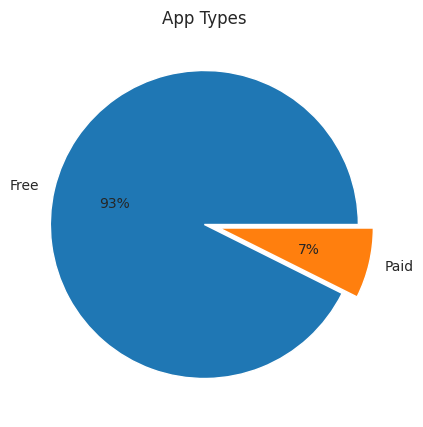

In [299]:
# visualizing App Types in a pie chart

plt.figure(figsize=(5,5))
fig = df_cleaned.groupby("Type")["Type"].count().plot(kind="pie", autopct='%1.0f%%', shadow=False, explode=(0,0.1))
fig.set_title("App Types")
fig.set_ylabel("")
plt.show()

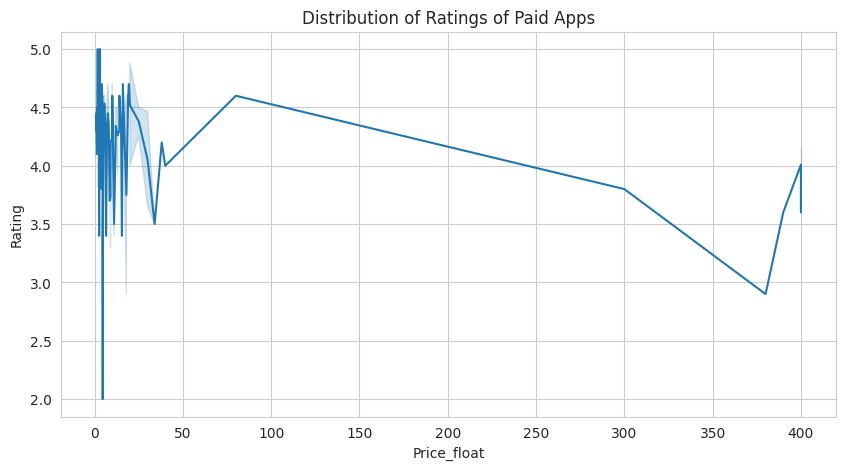

In [304]:
# Generating a sns line plot to compare ratings vs paid apps

plt.figure(figsize=(10,5))
sns.lineplot(data=df_cleaned[df_cleaned["Type"] == "Paid"], x="Price_float", y="Rating")
plt.title("Distribution of Ratings of Paid Apps")
plt.show()

In [268]:
# finding unique values in Content Rating column

df_cleaned['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [269]:
# count 'Content Rating' column's classes

df_cleaned['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

<ipython-input-275-0e99f3e2a580>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned["Content Rating"], palette="YlGnBu_r")


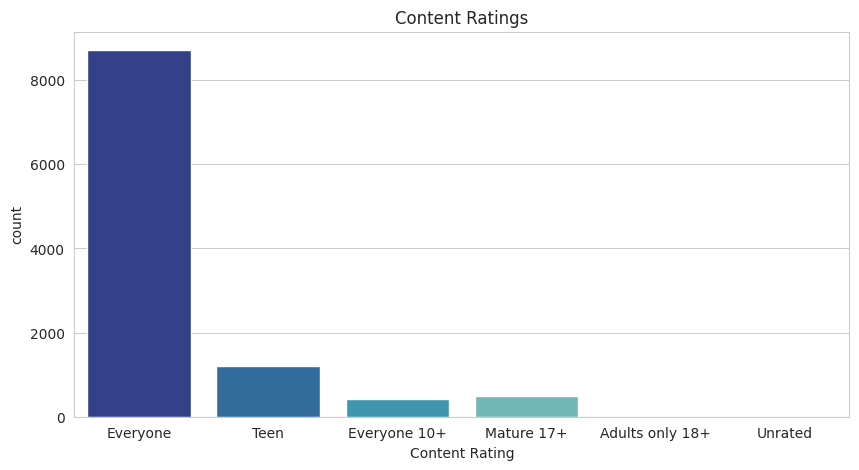

In [275]:
# visualizing the distribution of Content Rating

plt.figure(figsize=(10,5))
sns.countplot(x=df_cleaned["Content Rating"], palette="YlGnBu_r")
plt.title("Content Ratings")
plt.show()

In [159]:
# using map function to encode categorical variable values into numeric values

# Define a mapping dictionary
mapping_dict = {'Everyone': 1, 'Teen':2, 'Everyone 10+' :3, 'Mature 17+' : 4, 'Adults only 18+' : 5, 'Unrated' : 0}

# Mapping the values in the 'Type' column using the dictionary
df_cleaned['Content Rating_Encoded'] = df_cleaned['Content Rating'].map(mapping_dict)

<ipython-input-159-e08aa123993c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Content Rating_Encoded'] = df_cleaned['Content Rating'].map(mapping_dict)


In [276]:
# finding unique values in Genres column

df_cleaned['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [277]:
# count 'Genres' column's classes

df_cleaned['Genres'].value_counts()

Tools                                842
Entertainment                        623
Education                            549
Medical                              463
Business                             460
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

In [278]:
# using sklearn to encode categorical variable values into numeric values

from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
labelEncoderObj = LabelEncoder()

# Genres column has many uniques values / classes hence auto encoder is the best method instead of map

# Fit and transforming the categorical variable to numeric values
df_cleaned['Genres_Encoded'] = labelEncoderObj.fit_transform(df_cleaned['Genres'])

<ipython-input-278-c81eed01f7fc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Genres_Encoded'] = labelEncoderObj.fit_transform(df_cleaned['Genres'])


In [279]:
# finding unique values in the Category column

df_cleaned['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [280]:
# count Category column classes

df_cleaned['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [320]:
# Encoding Category column values to numeric values

# Fit and transforming the categorical variable to numeric values
df_cleaned['Category_Encoded'] = labelEncoderObj.fit_transform(df_cleaned['Category'])

<ipython-input-320-f0bc7ffe41bf>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [281]:
# count App column classes

df_cleaned['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [282]:
# labels in 'App' variable

df_cleaned.App.unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [283]:
# Encoding App column values to numeric values

# Fit and transforming the categorical variable to numeric values
df_cleaned['App_Encoded'] = labelEncoderObj.fit_transform(df_cleaned['App'])

<ipython-input-283-3cf6d0ea62d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['App_Encoded'] = labelEncoderObj.fit_transform(df_cleaned['App'])


In [284]:
# labels in 'Current Ver' variable

df_cleaned['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [285]:
# Encoding Current Ver column values to numeric values

# Fit and transforming the categorical variable to numeric values
df_cleaned['Current Ver_Encoded'] = labelEncoderObj.fit_transform(df_cleaned['Current Ver'])

<ipython-input-285-e6219b04668e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Current Ver_Encoded'] = labelEncoderObj.fit_transform(df_cleaned['Current Ver'])


In [286]:
# labels in 'Android Ver' variable

df_cleaned['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [287]:
# Encoding Android Ver column values to numeric values

# Fit and transforming the categorical variable to numeric values
df_cleaned['Android Ver_Encoded'] = labelEncoderObj.fit_transform(df_cleaned['Android Ver'])

<ipython-input-287-2f49001c9b18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Android Ver_Encoded'] = labelEncoderObj.fit_transform(df_cleaned['Android Ver'])


In [288]:
# adding a new column by converting the Reviews column to a float type

# df_cleaned['Reviews_Log'] = df_cleaned['Reviews'].astype(float).apply(np.log) # THIS LOG VALUES THROW AN ERROR AT THE TIME OF FIT THE MODEL

df_cleaned['Reviews_float'] = df_cleaned['Reviews'].astype(float)

<ipython-input-288-82fca8961f24>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Reviews_float'] = df_cleaned['Reviews'].astype(float)


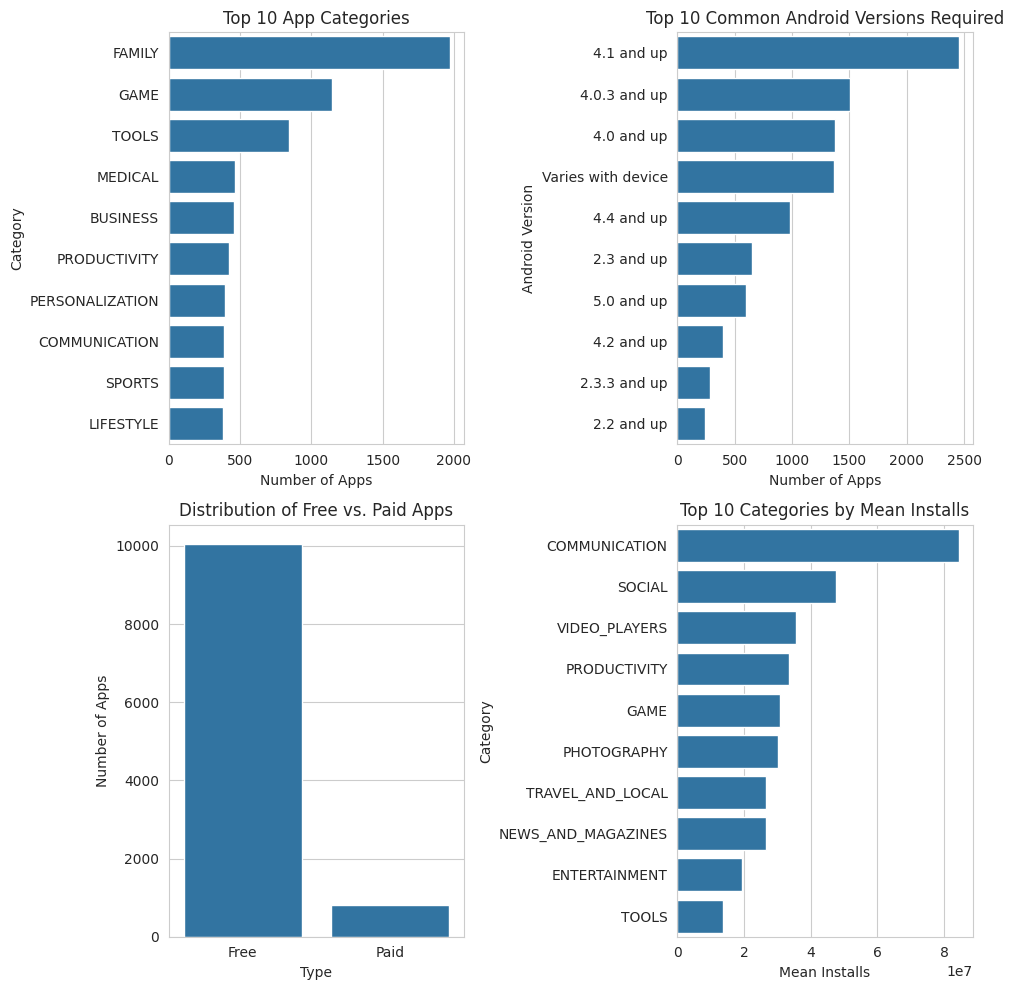

In [289]:
# visualization setup
fig, ax = plt.subplots(2, 2, figsize=(10, 10), dpi=100)


# best categories
top_categories = df_cleaned['Category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, ax=ax[0, 0])
ax[0, 0].set_title('Top 10 App Categories')
ax[0, 0].set_xlabel('Number of Apps')
ax[0, 0].set_ylabel('Category')


# common android versions
common_android_versions = df_cleaned['Android Ver'].value_counts().head(10)
sns.barplot(x=common_android_versions.values, y=common_android_versions.index, ax=ax[0, 1])
ax[0, 1].set_title('Top 10 Common Android Versions Required')
ax[0, 1].set_xlabel('Number of Apps')
ax[0, 1].set_ylabel('Android Version')


# free vs. paid apps distribution
free_vs_paid = df_cleaned['Type'].value_counts()
sns.barplot(x=free_vs_paid.index, y=free_vs_paid.values, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Free vs. Paid Apps')
ax[1, 0].set_xlabel('Type')
ax[1, 0].set_ylabel('Number of Apps')


# install ranges per category - mean installs
mean_installs_per_category = df_cleaned.groupby('Category')['Installs'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=mean_installs_per_category.values, y=mean_installs_per_category.index, ax=ax[1, 1])
ax[1, 1].set_title('Top 10 Categories by Mean Installs')
ax[1, 1].set_xlabel('Mean Installs')
ax[1, 1].set_ylabel('Category')


plt.tight_layout()
plt.show()


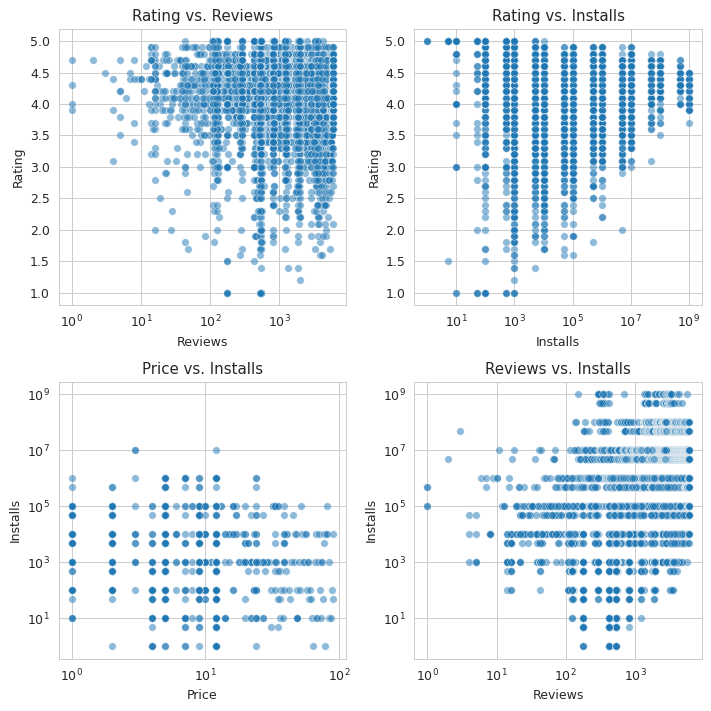

In [290]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8), dpi=90)

# rating vs. reviews
sns.scatterplot(x='Reviews', y='Rating', data=df_cleaned, ax=ax[0, 0], alpha=0.5)
ax[0, 0].set_title('Rating vs. Reviews')
ax[0, 0].set_xlabel('Reviews')
ax[0, 0].set_ylabel('Rating')
ax[0, 0].set_xscale('log')  # Using log scale due to wide range of values

# rating vs. installs
sns.scatterplot(x='Installs', y='Rating', data=df_cleaned, ax=ax[0, 1], alpha=0.5)
ax[0, 1].set_title('Rating vs. Installs')
ax[0, 1].set_xlabel('Installs')
ax[0, 1].set_ylabel('Rating')
ax[0, 1].set_xscale('log')  # Using log scale due to wide range of values

# price vs. installs
sns.scatterplot(x='Price', y='Installs', data=df_cleaned, ax=ax[1, 0], alpha=0.5)
ax[1, 0].set_title('Price vs. Installs')
ax[1, 0].set_xlabel('Price')
ax[1, 0].set_ylabel('Installs')
ax[1, 0].set_xscale('log')  # Using log scale due to wide range of values
ax[1, 0].set_yscale('log')  # Also log scale for better visualization

# reviews vs. installs
sns.scatterplot(x='Reviews', y='Installs', data=df_cleaned, ax=ax[1, 1], alpha=0.5)
ax[1, 1].set_title('Reviews vs. Installs')
ax[1, 1].set_xlabel('Reviews')
ax[1, 1].set_ylabel('Installs')
ax[1, 1].set_xscale('log')  # Using log scale due to wide range of values
ax[1, 1].set_yscale('log')  # Also log scale for better visualization

plt.tight_layout()
plt.show()

In [306]:
df_cleaned.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Price_float', 'Last Updated_dt', 'Installs_log',
       'Type_Encoded', 'Genres_Encoded', 'App_Encoded', 'Current Ver_Encoded',
       'Android Ver_Encoded', 'Reviews_float', 'Rating_mis_handled'],
      dtype='object')

<ipython-input-292-b3e2ce083dd3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_apps, x='Reviews_float', y='App', palette='viridis')


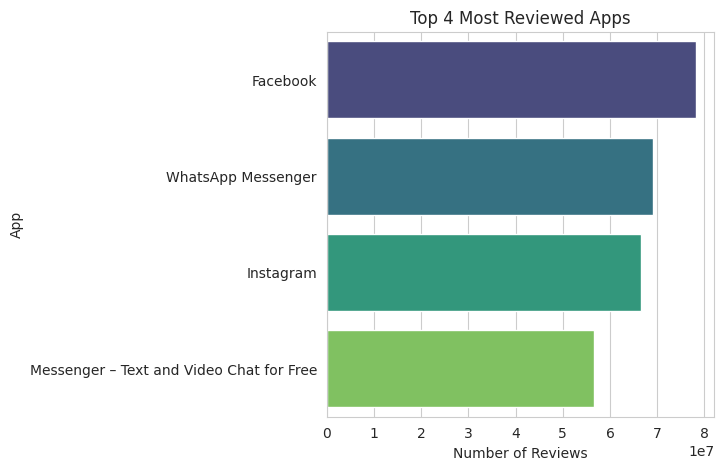

In [292]:
# sorting the dataframe by the 'reviews' column and select the top 10 rows
top_10_apps = df_cleaned.sort_values('Reviews_float', ascending=False).head(10)

# creating a bar plot
plt.figure(figsize=(5, 5))
sns.barplot(data=top_10_apps, x='Reviews_float', y='App', palette='viridis')
plt.xlabel('Number of Reviews')
plt.ylabel('App')
plt.title('Top 4 Most Reviewed Apps')

plt.show()

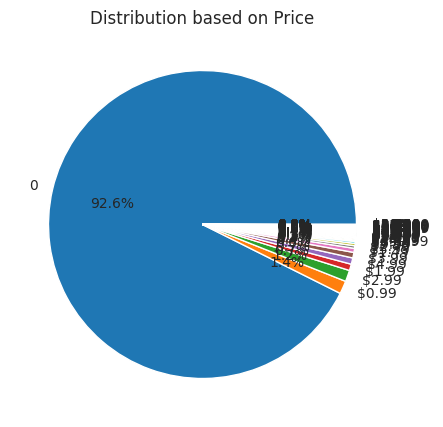

In [293]:
# Plotting a pie chart to display the distribution of price.

downloads = df_cleaned['Price'].value_counts()
plt.figure(figsize=(5,5))
downloads.plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution based on Price")
plt.ylabel('')
plt.show()

In [295]:
# Rating column has many missing values
# it is possible to use a ML model to predict missing categorical values based on other features in the dataset.

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df_cleaned['Rating_mis_handled'] = imputer.fit_transform(df_cleaned[['Rating']])

<ipython-input-295-17bf083eb21d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Rating_mis_handled'] = imputer.fit_transform(df_cleaned[['Rating']])


In [167]:
df_cleaned['Rating_mis_handled'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

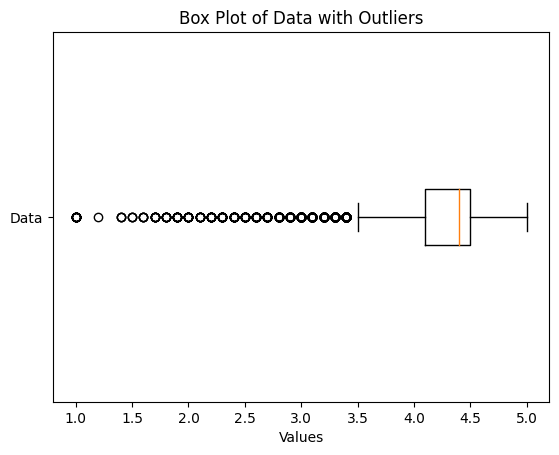

In [168]:
# Generating a box plot to find outliers

plt.boxplot(df_cleaned['Rating_mis_handled'], vert=False, labels=['Data'])
plt.title('Box Plot of Data with Outliers')
plt.xlabel('Values')
plt.show()

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-170-923d8ac3d300>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cleaned['Rating_mis_handled'])


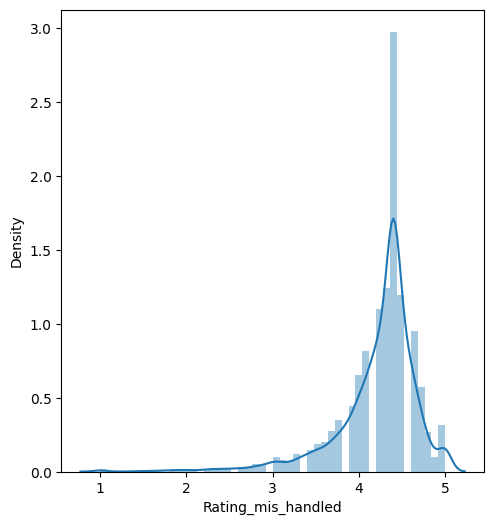

In [170]:
# plotting the destribution of the column data to find the skewness

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df_cleaned['Rating_mis_handled'])

plt.show()

In [171]:
# finding the skewness
# negative value means the distribution of the column's data has been skewed to the left

df_cleaned['Rating_mis_handled'].skew()

-2.0902251713418454

In [172]:
# finding the bounadray values

print('Heigth allowed=',df_cleaned['Rating_mis_handled'].mean()+3*df_cleaned['Rating_mis_handled'].std())
print('Lowest allowed=',df_cleaned['Rating_mis_handled'].mean()-3*df_cleaned['Rating_mis_handled'].std())

Heigth allowed= 5.672665881781542
Lowest allowed= 2.767481719694473


In [173]:
# finding outliers

df_cleaned[(df_cleaned['Rating_mis_handled']>5.67 )|( df_cleaned['Rating_mis_handled']<2.77)]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Installs_log,Type_Encoded,Content Rating_Encoded,Genres_Encoded,Category_Encoded,App_Encoded,Current Ver_Encoded,Android Ver_Encoded,Reviews_float,Rating_mis_handled
477,Calculator,DATING,2.6,57,1000.0,Paid,$6.99,Everyone,Dating,25-Oct-17,...,6.908755,1.0,1,38,7,2297,318,13,57.0,2.6
518,Just She - Top Lesbian Dating,DATING,1.9,953,100000.0,Free,0,Mature 17+,Dating,18-Jul-18,...,11.512935,0.0,4,38,7,5512,2384,25,953.0,1.9
520,EliteSingles – Dating for Single Professionals,DATING,2.5,5377,500000.0,Free,0,Mature 17+,Dating,31-Jul-18,...,13.122365,0.0,4,38,7,3946,2083,15,5377.0,2.5
527,Sugar Daddy Dating App,DATING,2.5,277,100000.0,Free,0,Mature 17+,Dating,4-Dec-17,...,11.512935,0.0,4,38,7,8085,1498,17,277.0,2.5
549,EliteSingles – Dating for Single Professionals,DATING,2.5,5377,500000.0,Free,0,Mature 17+,Dating,31-Jul-18,...,13.122365,0.0,4,38,7,3946,2083,15,5377.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10562,FK Atlantas,SPORTS,1.5,2,5.0,Free,0,Everyone,Sports,21-Feb-18,...,1.791759,0.0,1,102,28,4207,108,17,2.0,1.5
10578,Check Lottery Tickets - Florida,FAMILY,2.0,27,5000.0,Free,0,Teen,Entertainment,17-Oct-17,...,8.517393,0.0,2,52,11,2482,1069,15,27.0,2.0
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,500.0,Free,0,Everyone,Tools,12-Dec-17,...,6.216606,0.0,1,108,29,5893,108,18,3.0,1.0
10677,Pint - FN Theme,PERSONALIZATION,2.5,6,100.0,Free,0,Everyone,Personalization,10-Aug-13,...,4.615121,0.0,1,80,23,7012,108,7,6.0,2.5


In [174]:
# checking the dimention of the data set

df_cleaned.shape

(10840, 24)

In [175]:
# trimming

df_cleaned=df_cleaned[(df_cleaned['Rating_mis_handled']<5.31) & (df_cleaned['Rating_mis_handled']>3.28)]

In [176]:
# checking the dimention of the data set after trimming / removing outliers

df_cleaned.shape

(10337, 24)

UNIT TEST / REMOVING OUTLIERS

In [ ]:
# UNIT TEST

# defining a function to remove outliers


import numpy as np

def remove_outliers(data):
    # Calculate Q1 and Q3
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    # Calculate IQR
    iqr = q3 - q1

    # Define threshold multiplier (1.5 is a common choice)
    threshold = 1.5

    # Identify outliers
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    outliers = (data < lower_bound) | (data > upper_bound)

    # Remove outliers
    cleaned_data = data[~outliers]

    return cleaned_data


cleaned_data = remove_outliers(df_cleaned['Rating_mis_handled'])

print("Original Data:", df_cleaned['Rating_mis_handled'])
print("Cleaned Data:", cleaned_data)



# generating Z score

from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_cleaned['Rating_mis_handled']))
print(z)



# finding row index of outliers

# based on the z-score criteria, the below code prints positions of the outliers in the column
# threshold = 2

# Position of the outlier
print(np.where(z > 2))




# dropping rows that are having outlier values

rows_to_drop = np.where(z > 2)
print(rows_to_drop)
# converting row indexes to a 1D array
rows_to_drop = np.unique(rows_to_drop[0])

# Using a for loop to drop rows
for row_index in rows_to_drop:
    df_cleaned = df_cleaned.drop(index=row_index)

# dropping rows based on the array of row indexes
# df_cleaned.drop(index=rows_to_drop)

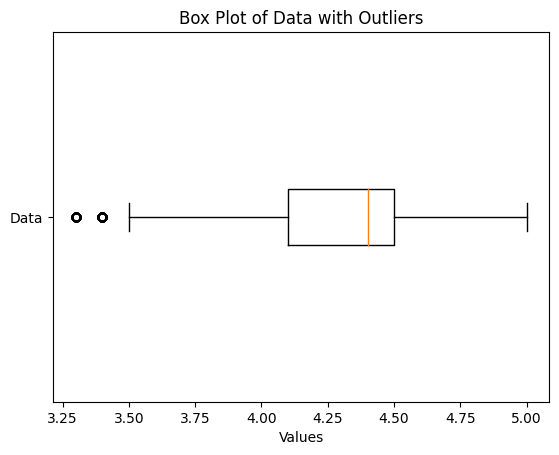

In [177]:
# Generating a box plot to after removing outliers

plt.boxplot(df_cleaned['Rating_mis_handled'], vert=False, labels=['Data'])
plt.title('Box Plot of Data with Outliers')
plt.xlabel('Values')
plt.show()

REMOVE OUTLIERS FROM THE PRICE_FLOAT

In [178]:
df_cleaned.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Price_float', 'Last Updated_dt', 'Installs_log',
       'Type_Encoded', 'Content Rating_Encoded', 'Genres_Encoded',
       'Category_Encoded', 'App_Encoded', 'Current Ver_Encoded',
       'Android Ver_Encoded', 'Reviews_float', 'Rating_mis_handled'],
      dtype='object')

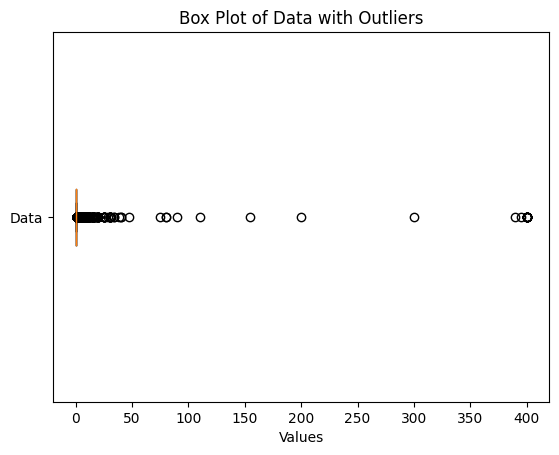

In [179]:
# Generating a box plot to after removing outliers

plt.boxplot(df_cleaned['Price_float'], vert=False, labels=['Data'])
plt.title('Box Plot of Data with Outliers')
plt.xlabel('Values')
plt.show()

In [180]:
# before trimming

df_cleaned.Price_float.shape

(10337,)

In [181]:
# find skew value

df_cleaned['Price_float'].skew()

23.790934609578816

In [182]:
# Finding the bounadray values

print('Heigth allowed=',df_cleaned['Price_float'].mean()+3*df_cleaned['Price_float'].std())
print('Lowest allowed=',df_cleaned['Price_float'].mean()-3*df_cleaned['Price_float'].std())

Heigth allowed= 48.723366340353536
Lowest allowed= -46.66852837962992


In [183]:
#find the outlier

df_cleaned[(df_cleaned['Price_float']>2.52 )|( df_cleaned['Price_float']<-2.16)]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Installs_log,Type_Encoded,Content Rating_Encoded,Genres_Encoded,Category_Encoded,App_Encoded,Current Ver_Encoded,Android Ver_Encoded,Reviews_float,Rating_mis_handled
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,100000.0,Paid,$4.99,Everyone,Business,25-Mar-18,...,11.512935,1.0,1,22,4,8634,648,13,11442.0,4.7
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,100000.0,Paid,$4.99,Everyone,Business,11-Apr-17,...,11.512935,1.0,1,22,4,8488,1716,10,10295.0,4.8
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,100000.0,Paid,$4.99,Everyone,Business,25-Mar-18,...,11.512935,1.0,1,22,4,8634,648,13,11442.0,4.7
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,100000.0,Paid,$4.99,Everyone,Business,11-Apr-17,...,11.512935,1.0,1,22,4,8488,1716,10,10295.0,4.8
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,100000.0,Paid,$3.99,Everyone,Communication,5-Jul-18,...,11.512935,1.0,1,36,6,7178,2515,17,18247.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10669,Pistolet FN GP35 expliqué,BOOKS_AND_REFERENCE,NaN,2,5.0,Paid,$5.99,Everyone,Books & Reference,19-Aug-14,...,1.791759,1.0,1,19,3,7017,2658,2,2.0,4.4
10674,Pistolet FN 1906 expliqué,BOOKS_AND_REFERENCE,NaN,0,10.0,Paid,$5.49,Everyone,Books & Reference,17-Aug-14,...,2.397895,1.0,1,19,3,7016,2658,2,0.0,4.4
10679,Solitaire+,GAME,4.6,11235,100000.0,Paid,$2.99,Everyone,Card,30-Jul-18,...,11.512935,1.0,1,23,14,7925,2716,32,11235.0,4.6
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,1000.0,Paid,$7.99,Everyone,Health & Fitness,8-Aug-18,...,6.908755,1.0,1,62,15,4393,797,18,35.0,4.4


In [184]:
# trimming

df_cleaned=df[(df_cleaned['Price_float']<2.52) & (df_cleaned['Price_float']> -2.16)]

<ipython-input-184-facbb738a78e>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned=df[(df_cleaned['Price_float']<2.52) & (df_cleaned['Price_float']> -2.16)]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

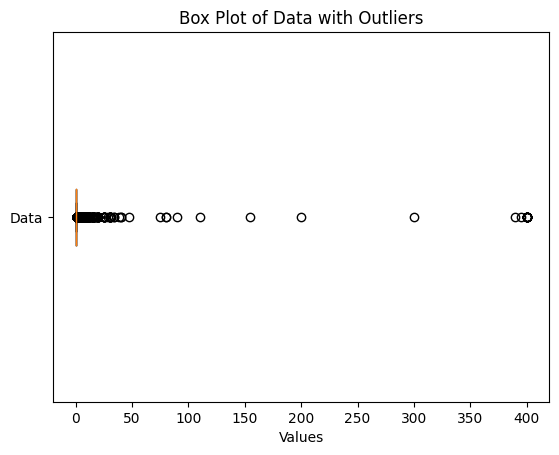

In [185]:
# Generating a box plot to after removing outliers

plt.boxplot(df_cleaned['Price_float'], vert=False, labels=['Data'])
plt.title('Box Plot of Data with Outliers')
plt.xlabel('Values')
plt.show()

In [186]:
# numerical variables

numerical = [var for var in df_cleaned.columns if df_cleaned[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('numerical vars :', numerical)

There are 14 numerical variables

numerical vars : ['Rating', 'Installs', 'Price_float', 'Last Updated_dt', 'Installs_log', 'Type_Encoded', 'Content Rating_Encoded', 'Genres_Encoded', 'Category_Encoded', 'App_Encoded', 'Current Ver_Encoded', 'Android Ver_Encoded', 'Reviews_float', 'Rating_mis_handled']


In [187]:
df_cleaned.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Price_float', 'Last Updated_dt', 'Installs_log',
       'Type_Encoded', 'Content Rating_Encoded', 'Genres_Encoded',
       'Category_Encoded', 'App_Encoded', 'Current Ver_Encoded',
       'Android Ver_Encoded', 'Reviews_float', 'Rating_mis_handled'],
      dtype='object')

In [188]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10337 entries, 0 to 10840
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     10337 non-null  object        
 1   Category                10337 non-null  object        
 2   Rating                  8863 non-null   float64       
 3   Reviews                 10337 non-null  object        
 4   Installs                10337 non-null  float64       
 5   Type                    10336 non-null  object        
 6   Price                   10337 non-null  object        
 7   Content Rating          10337 non-null  object        
 8   Genres                  10337 non-null  object        
 9   Last Updated            10337 non-null  object        
 10  Current Ver             10330 non-null  object        
 11  Android Ver             10335 non-null  object        
 12  Price_float             10337 non-null  float6

In [189]:
# viewing data types

df_cleaned.dtypes

App                               object
Category                          object
Rating                           float64
Reviews                           object
Installs                         float64
Type                              object
Price                             object
Content Rating                    object
Genres                            object
Last Updated                      object
Current Ver                       object
Android Ver                       object
Price_float                      float64
Last Updated_dt           datetime64[ns]
Installs_log                     float64
Type_Encoded                     float64
Content Rating_Encoded             int64
Genres_Encoded                     int64
Category_Encoded                   int64
App_Encoded                        int64
Current Ver_Encoded                int64
Android Ver_Encoded                int64
Reviews_float                    float64
Rating_mis_handled               float64
dtype: object

In [190]:
pip install --upgrade category_encoders

In [191]:
# missing values in numerical variable

df_cleaned[numerical].isnull().sum()

Rating                    1474
Installs                     0
Price_float                  0
Last Updated_dt              0
Installs_log                 0
Type_Encoded                 1
Content Rating_Encoded       0
Genres_Encoded               0
Category_Encoded             0
App_Encoded                  0
Current Ver_Encoded          0
Android Ver_Encoded          0
Reviews_float                0
Rating_mis_handled           0
dtype: int64

In [192]:
# numerical variable / target variable / dependent variable

df_cleaned[categorical].head()

,App,Category,Reviews,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,967,Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [193]:
# numerical variable / target variable / dependent variable

df_cleaned[numerical].head()

,Rating,Installs,Price_float,Last Updated_dt,Installs_log,Type_Encoded,Content Rating_Encoded,Genres_Encoded,Category_Encoded,App_Encoded,Current Ver_Encoded,Android Ver_Encoded,Reviews_float,Rating_mis_handled
0,4.1,10000.0,0.0,2018-01-07,9.210440,0.0,1,9,0,6962,114,15,159.0,4.1
1,3.9,500000.0,0.0,2018-01-15,13.122365,0.0,1,12,0,2632,996,15,967.0,3.9
2,4.7,5000000.0,0.0,2018-08-01,15.424949,0.0,1,9,0,8656,458,15,87510.0,4.7
3,4.5,50000000.0,0.0,2018-06-08,17.727534,0.0,2,9,0,7827,2716,18,215644.0,4.5
4,4.3,100000.0,0.0,2018-06-20,11.512935,0.0,1,11,0,7022,272,20,967.0,4.3


In [194]:
# missing values in numerical variable

df_cleaned[numerical].isnull().sum()

Rating                    1474
Installs                     0
Price_float                  0
Last Updated_dt              0
Installs_log                 0
Type_Encoded                 1
Content Rating_Encoded       0
Genres_Encoded               0
Category_Encoded             0
App_Encoded                  0
Current Ver_Encoded          0
Android Ver_Encoded          0
Reviews_float                0
Rating_mis_handled           0
dtype: int64

In [195]:
# viewing total null of each column

df_cleaned.isnull().sum()

App                          0
Category                     0
Rating                    1474
Reviews                      0
Installs                     0
Type                         1
Price                        0
Content Rating               0
Genres                       0
Last Updated                 0
Current Ver                  7
Android Ver                  2
Price_float                  0
Last Updated_dt              0
Installs_log                 0
Type_Encoded                 1
Content Rating_Encoded       0
Genres_Encoded               0
Category_Encoded             0
App_Encoded                  0
Current Ver_Encoded          0
Android Ver_Encoded          0
Reviews_float                0
Rating_mis_handled           0
dtype: int64

In [196]:
# check na values

import numpy as np

np.isnan(df_cleaned['Type_Encoded']).sum()

1

In [129]:
# drop NA / NULL values
# df_cleaned = df_cleaned['Type_Encoded'].dropna() NO NEED THIS

In [197]:
# viewing total null of each column

df_cleaned.isnull().sum()

App                          0
Category                     0
Rating                    1474
Reviews                      0
Installs                     0
Type                         1
Price                        0
Content Rating               0
Genres                       0
Last Updated                 0
Current Ver                  7
Android Ver                  2
Price_float                  0
Last Updated_dt              0
Installs_log                 0
Type_Encoded                 1
Content Rating_Encoded       0
Genres_Encoded               0
Category_Encoded             0
App_Encoded                  0
Current Ver_Encoded          0
Android Ver_Encoded          0
Reviews_float                0
Rating_mis_handled           0
dtype: int64

In [198]:
df_cleaned['Type_Encoded'].unique()

array([ 0.,  1., nan])

In [199]:
df_cleaned['Type_Encoded'].replace(np.NaN, 0, inplace=True)

In [ ]:
# viewing total null of each column

df_cleaned.isnull().sum()

In [ ]:
# using sklearn to encode categorical variable values into numeric values

# from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
# labelEncoderObj = LabelEncoder()

# Fit and transforming the categorical variable to numeric values
# df_cleaned['Installs_Encoded'] = labelEncoderObj.fit_transform(df_cleaned['Installs']) // NO NEED THIS, I MADE THE LOG VALUE

In [200]:
df_cleaned.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Price_float', 'Last Updated_dt', 'Installs_log',
       'Type_Encoded', 'Content Rating_Encoded', 'Genres_Encoded',
       'Category_Encoded', 'App_Encoded', 'Current Ver_Encoded',
       'Android Ver_Encoded', 'Reviews_float', 'Rating_mis_handled'],
      dtype='object')

Removing duplicates from App Encoded column

In [201]:
# finding duplicates

duplicates_count = df_cleaned.duplicated(subset=['App_Encoded']).sum()

print("Number of duplicate rows:", duplicates_count)

Number of duplicate rows: 1169


In [202]:
# Removing duplicates

df_cleaned.drop_duplicates(subset=['App_Encoded'], inplace=True)

print("Number of duplicate rows:", df_cleaned.duplicated().sum())

Number of duplicate rows: 0


In [321]:
df_cleaned.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Price_float', 'Last Updated_dt', 'Installs_log',
       'Type_Encoded', 'Genres_Encoded', 'App_Encoded', 'Current Ver_Encoded',
       'Android Ver_Encoded', 'Reviews_float', 'Rating_mis_handled',
       'Category_Encoded'],
      dtype='object')

In [332]:
# creating an iteractive scatter plot to display reviews vs rating

import plotly.express as px

fig = px.scatter(df_cleaned, x='Rating', y='Reviews_float', hover_data=['App_Encoded', 'Category_Encoded', 'Installs_log'])

# marker size, shape, and border line customization
fig.update_traces(
    marker=dict(
        size=12,  # to increase the size of the data points
        symbol='diamond',  # to change the shape of the data points to a circle
        line=dict(
            color='orange',  # border line color
            width=2  # width of the border line
        ),
        color='rgba(0, 0, 0, 0)'  # marker color

    )
)

# Customize the layout
fig.update_layout(
    title="Reviews vs Ratings in Google Apps Store",
    xaxis_title="Ratings",
    yaxis_title="Number of Reviews",
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="blue"
    ),
    plot_bgcolor='black',  # plot background color
    hoverlabel=dict(
        bgcolor="yellow",  # hover label background color
        font_size=14
    ),
    xaxis=dict(
        gridcolor='lightgrey'  # gridlines
    ),
    yaxis=dict(
        gridcolor='lightgrey'  # gridlines
    )
)

fig.show()

In [323]:
df_cleaned.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Price_float', 'Last Updated_dt', 'Installs_log',
       'Type_Encoded', 'Genres_Encoded', 'App_Encoded', 'Current Ver_Encoded',
       'Android Ver_Encoded', 'Reviews_float', 'Rating_mis_handled',
       'Category_Encoded'],
      dtype='object')

In [333]:
# viewing total null of each column

df_cleaned.isnull().sum()

App                       0
Category                  0
Rating                 1474
Reviews                   0
Installs                  0
Type                      1
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               8
Android Ver               2
Price_float               0
Last Updated_dt           0
Installs_log              0
Type_Encoded              1
Genres_Encoded            0
App_Encoded               0
Current Ver_Encoded       0
Android Ver_Encoded       0
Reviews_float             0
Rating_mis_handled        0
Category_Encoded          0
dtype: int64

SPLIT DATA TO TRAIN AND TEST

In [203]:
# Spliting data into two arrays: X (features) and y (labels).

feature_columns = ['Type_Encoded', 'Content Rating_Encoded', 'Genres_Encoded','Category_Encoded', 'App_Encoded', 'Reviews_float']

x = df_cleaned[feature_columns].values
y = df_cleaned['Rating_mis_handled'].values


In [204]:
# Split data into 80% of train data set and 20% of test data set

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [205]:
# checking test and train set sizes

print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(7334, 6) (1834, 6) (7334,) (1834,)


In [206]:
# Standardize features by removing the mean and scaling to unit variance
# Standard Scaling for model efficiency

from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Split data into 80% of train data set and 20% of test data set

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [ ]:
# checking test and train set sizes

print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(7334, 11) (1834, 11) (7334,) (1834,)


In [ ]:
# Standardize features by removing the mean and scaling to unit variance
# Standard Scaling for model efficiency

from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [207]:
from sklearn.ensemble import RandomForestRegressor
# RandomForestRegressor is a classifier which expects float numbers (labels), but RandomForestClassifier expects discrete numbers (labels).

# Create another Random Forest Regressor model with a different parameters
rfr_model = RandomForestRegressor(n_estimators=100, random_state=52)

In [208]:
# Build a forest of trees from the training set (X, y).
# Fit the model on the training data
# Fit the model with X_Train

rfr_model.fit(X_train, y_train)

RandomForestRegressor(random_state=52)

In [209]:
# Assigning predictions that has captured from the features of the test set
# Make predictions on the test set

y_pred = rfr_model.predict(X_test)

In [210]:
# Evaluating the model

# thisis to match y_test values that has been captured earlier with the y_pred predicted values
# accuracy score measures the proportion of the correct predictions out of the total predictions
# accuracy = accuracy_score(y_test, y_pred) : accuracy_score function = this is for classification tasks only, therefore, score() function can be used as follow

rfr_model.score(X_train, y_train)

0.8636001540038032

Mean Absolute Error (MAE): 0.2526810250817889
Mean Squared Error (MSE): 0.11208892529989097
R-squared (R2): 0.036350242206164673


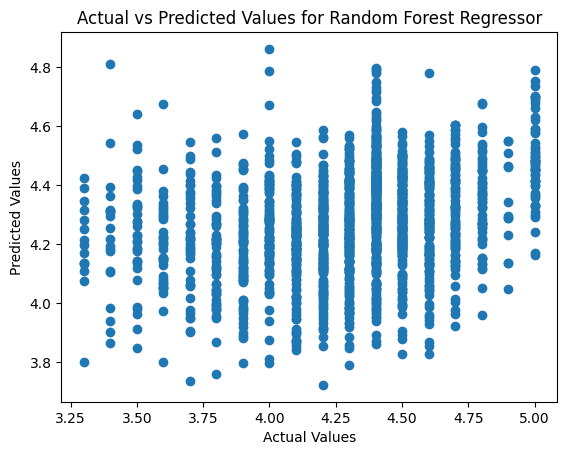

In [211]:
# Evaluating the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the regression report
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}') # # In regression tasks, it is good to use the metric R-squared (co-effecient of determination)

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.show()

TRYING TO INCREASE MODEL'S PERFORMANCE

In [212]:
# Spliting data into two arrays: X (features) and y (labels).

feature_columns = ['Installs_log','Type_Encoded', 'Content Rating_Encoded', 'Genres_Encoded','Category_Encoded', 'App_Encoded', 'Current Ver_Encoded',
       'Android Ver_Encoded','Reviews_float']

x = df_cleaned[feature_columns].values
y = df_cleaned['Rating_mis_handled'].values


In [213]:
# Split data into 80% of train data set and 20% of test data set

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [214]:
# checking test and train set sizes

print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(7334, 9) (1834, 9) (7334,) (1834,)


In [215]:
# Standardize features by removing the mean and scaling to unit variance
# Standard Scaling for model efficiency

from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_std  = True ,with_mean = True, copy = True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [216]:
# Split data into 80% of train data set and 20% of test data set

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [217]:
# RandomForestRegressor is a classifier which expects float numbers (labels), but RandomForestClassifier expects discrete numbers (labels).

# Create another Random Forest Regressor model with a different parameters
rfr_model = RandomForestRegressor(n_estimators=100, random_state=52)

In [218]:
# Build a forest of trees from the training set (X, y).
# Fit the model on the training data
# Fit the model with X_Train

rfr_model.fit(X_train, y_train)

RandomForestRegressor(random_state=52)

In [219]:
# Assigning predictions that has captured from the features of the test set
# Make predictions on the test set

y_pred = rfr_model.predict(X_test)

In [220]:
# Evaluating the model

# thisis to match y_test values that has been captured earlier with the y_pred predicted values
# accuracy score measures the proportion of the correct predictions out of the total predictions
# accuracy = accuracy_score(y_test, y_pred) : accuracy_score function = this is for classification tasks only, therefore, score() function can be used as follow

rfr_model.score(X_train, y_train)


0.8838922397900871

Mean Absolute Error (MAE): 0.23735823336968437
Mean Squared Error (MSE): 0.09836388495092696
R-squared (R2): 0.1543470181820571


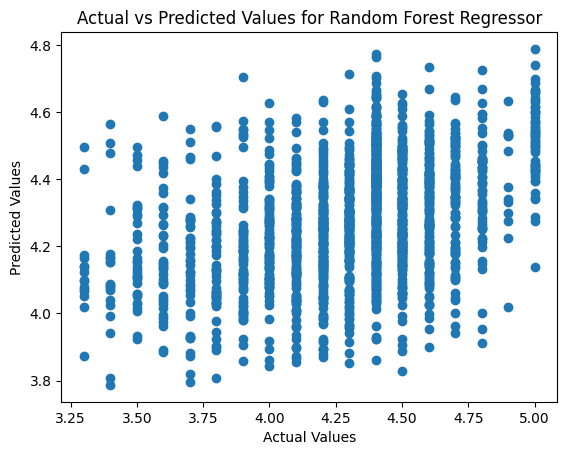

In [221]:
# Evaluating the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the regression report
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}') # # In regression tasks, it is good to use the metric R-squared (co-effecient of determination)

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regressor')
plt.show()




In [ ]:
# DONT RUN FEATURE SCALLING HERE

# feature scalling

# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()

# X_train = scaler.fit_transform(X_train)

# X_test = scaler.transform(X_test)

# X_train = pd.DataFrame(X_train)

# X_test = pd.DataFrame(X_test)

# X_train.head()

# X_test.head()

In [222]:
# For finding best features among others.
# To label the features form best to worst using above defined feature_columns
# Using RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

r_forest_r = RandomForestRegressor(n_estimators=500,random_state=1)
r_forest_r.fit(X_train, y_train)

importances = r_forest_r.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feature_columns[indices[f]], importances[indices[f]]))


 1) Reviews_float                  0.234490
 2) App_Encoded                    0.185871
 3) Current Ver_Encoded            0.155397
 4) Installs_log                   0.134744
 5) Genres_Encoded                 0.089090
 6) Android Ver_Encoded            0.088953
 7) Category_Encoded               0.074568
 8) Content Rating_Encoded         0.024387
 9) Type_Encoded                   0.012501


TypeError: only integer scalar arrays can be converted to a scalar index

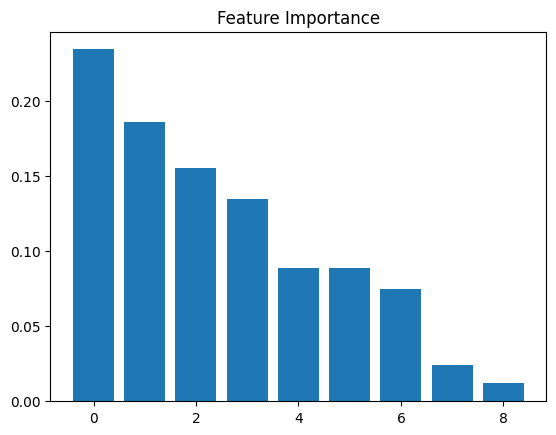

In [223]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')

# plt.xticks(range(X_train.shape[1]), feature_columns[indices], rotation=90)
plt.tick_params(axis='x', labels=feature_columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

plt.show()

In [224]:
# displaying predictions and actual values with their differences

for z in zip(y_test, y_pred):
    print(z, (z[0]-z[1]) /z[0] )

(4.6, 4.175999999999998) 0.09217391304347854
(4.3, 4.446999999999997) -0.03418604651162734
(4.4, 4.414999999999993) -0.0034090909090892215
(4.5, 4.236999999999999) 0.05844444444444462
(4.1, 4.113999999999999) -0.0034146341463413043
(4.4, 4.177000000000003) 0.050681818181817544
(4.6, 4.137) 0.1006521739130435
(4.4, 4.400000000000017) -3.83531590325054e-15
(4.5, 4.487000000000002) 0.002888888888888472
(3.8, 4.062000000000001) -0.06894736842105299
(4.4, 4.399999999999997) 8.074349270001138e-16
(4.7, 4.342000000000002) 0.076170212765957
(4.1, 4.149) -0.011951219512195214
(4.5, 4.235000000000002) 0.05888888888888842
(4.4, 4.400000000000017) -3.83531590325054e-15
(4.1, 4.449000000000001) -0.08512195121951247
(4.7, 4.322) 0.08042553191489364
(3.4, 4.080999999999999) -0.20029411764705846
(4.4, 4.349000000000003) 0.01159090909090852
(4.2, 4.278000000000002) -0.01857142857142906
(4.2, 3.925) 0.06547619047619056
(4.4, 4.436999999999998) -0.008409090909090285
(4.4, 4.400000000000017) -3.8353159032

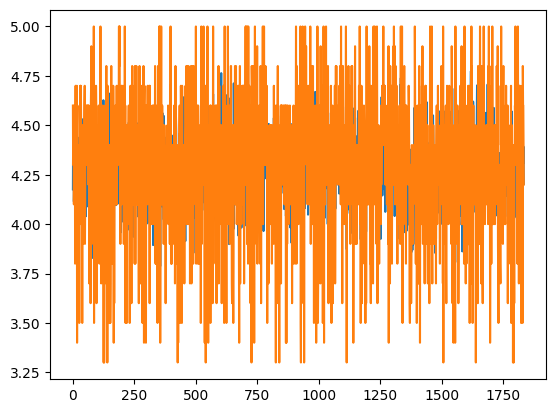

In [225]:
# plotting actual Ratings (orange line) and Predicted Ratings(blue line)

r = []
for pair in  zip(y_pred, y_test):
  r.append(pair)

plt.plot(r)

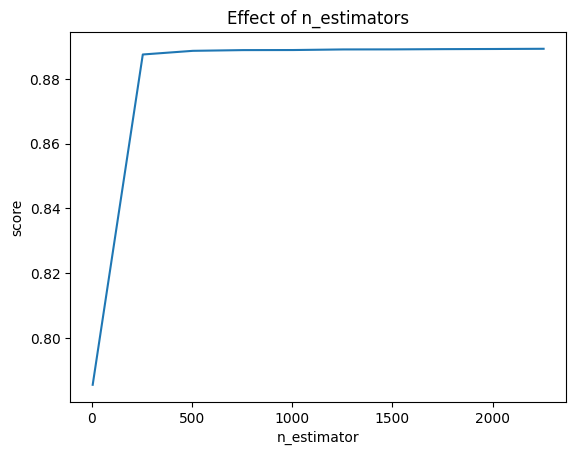

In [226]:
# Effect of estimators on score
# With np.range it is possible to find the most efficient estimator value.

estimators = np.arange(5, 2500, 250) # 0 to 2500 increased with 250
scores = []
for n in estimators:
    rfr_model.set_params(n_estimators=n)
    rfr_model.fit(X_train, y_train)
    scores.append(rfr_model.score(X_train, y_train))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

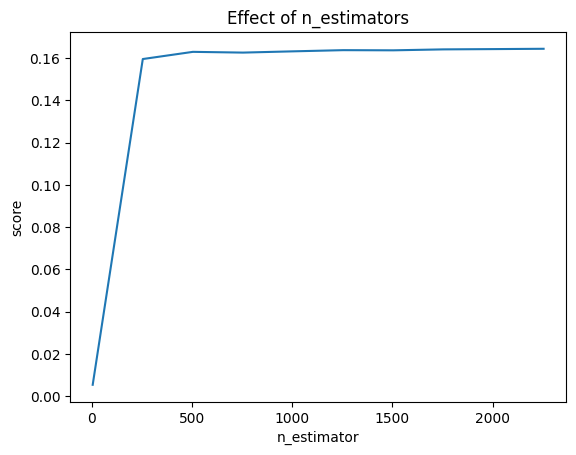

In [227]:

stimators = np.arange(5, 2500, 250) # 5 to 2500 increased with 250
scores = []
for n in estimators:
    rfr_model.set_params(n_estimators=n)
    rfr_model.fit(X_train, y_train)
    scores.append(rfr_model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)


In [228]:
y_pred[:20]

array([4.176, 4.447, 4.415, 4.237, 4.114, 4.177, 4.137, 4.4  , 4.487,
       4.062, 4.4  , 4.342, 4.149, 4.235, 4.4  , 4.449, 4.322, 4.081,
       4.349, 4.278])

In [ ]:
y_pred_test = r_forest_r.predict(X_test)
metrics.score(y_true, y_pred_test)

UNIT TEST

In [ ]:
# normalizing data / unit test

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sample dataset
data = {'Column1': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df['Column1_normalized'] = scaler.fit_transform(df[['Column1']])

# Display the original and normalized data
print("Original Data:")
print(df[['Column1']])

print("\nNormalized Data:")
print(df[['Column1_normalized']])

Original Data:
   Column1
0       10
1       20
2       30
3       40
4       50

Normalized Data:
   Column1_normalized
0                0.00
1                0.25
2                0.50
3                0.75
4                1.00
